# Cамоподобие Херста

In [105]:
import math
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np


%matplotlib inline

In [1]:
data = [
    (19, 1),
    (20, 0),
    (21, 2),
    (22, 0),
    (23, 2),
    (24, 0),
    (25, 1),
    (26, 2),
    (27, 1),
    (28, 1),
    (29, 3),
    (30, 5),
    (31, 5),
    (32, 2),
    (33, 3),
    (34, 6),
    (35, 5),
    (36, 5),
    (37, 2),
    (38, 8),
    (39, 4),
    (40, 4),
    (41, 10),
    (42, 12),
    (43, 8),
    (44, 7),
    (45, 7),
    (46, 8),
    (47, 2),
    (48, 6),
    (49, 2),
    (50, 1),
    (51, 4),
    (52, 2),
    (53, 1),
    (54, 1)
]

In [55]:
block_sizes = [12, 9, 7, 6, 5, 4, 3, 2, 1]

In [53]:
def blocks(arr, size):
    blocks = []
    pos = 0
    for i in range(size, len(arr)+1, size):
        blocks.append(arr[pos:i])
        pos = pos + size
    return blocks

def expected_value(arr):
    """
        Математическое ожидание
    """
    return sum(arr)/len(arr)

def variance(arr, exp):
    """
        Дисперсия
    """
    d = [math.pow(x - exp, 2) for x in arr]
    return sum(d)/len(d)

In [89]:
last_cnt = -1
x = []
y = []
for s in range(int(len(data)/3), 0, -1):
    block_cnt = int(len(data)/s)
    if block_cnt == last_cnt:
        continue
    last_cnt = block_cnt
    dds = []
    for block in blocks(data, block_cnt):
        vals = [y for x, y in block]
        ev = expected_value(vals)
        v = variance(vals, ev)
        dds.append(v)
    ress = expected_value(dds)
    x.append(math.log(1/s, 10))
    y.append(math.log(ress, 10))
    print("block: %s, count: %s, val: %s, ln: %s, ln_m: %s)" % (s, block_cnt, ress, math.log(ress, 10), math.log(1/s, 10)))

block: 12, count: 3, val: 2.685185185185185, ln: 0.4289742424120063, ln_m: -1.0791812460476247)
block: 9, count: 4, val: 3.2569444444444446, ln: 0.5128103506198336, ln_m: -0.9542425094393249)
block: 7, count: 5, val: 3.177142857142857, ln: 0.5020367428957629, ln_m: -0.8450980400142568)
block: 6, count: 6, val: 3.8472222222222228, ln: 0.58514727263318, ln_m: -0.7781512503836435)
block: 5, count: 7, val: 2.9551020408163264, ln: 0.4705724818326144, ln_m: -0.6989700043360187)
block: 4, count: 9, val: 4.382716049382716, ln: 0.6417433341764442, ln_m: -0.6020599913279623)
block: 3, count: 12, val: 6.1365740740740735, ln: 0.7879259809181812, ln_m: -0.47712125471966244)
block: 2, count: 18, val: 7.316358024691356, ln: 0.8642949494483632, ln_m: -0.30102999566398114)
block: 1, count: 36, val: 8.87885802469136, ln: 0.9483571115592581, ln_m: 0.0)


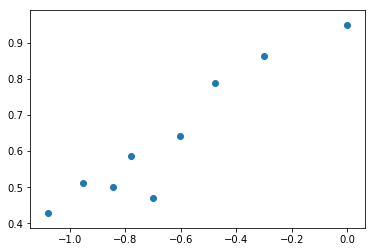

In [93]:
plt.scatter(x, y)

In [129]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
h = (2 - slope) / 2

In [130]:
print("y=%s*x+%s" %(slope, intercept))
print("correlation coefficient: %s" % r_value)
print("H=%s" % h)

y=0.523955870964*x+0.971910777527
correlation coefficient: 0.946081682677
H=0.738022064518


In [131]:
yl = []
xl = []

for xx in np.arange(min(x), max(x)+0.1, 0.1):
    xl.append(xx)
    yl.append(slope*xx + intercept)

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


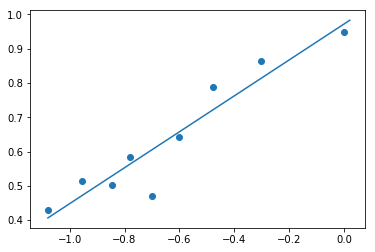

In [132]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(xl, yl)
fig.show()